In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"esrayuzgec","key":"2c0e73f0e1cea2d8f9e56fba987e2376"}'}

In [ ]:
!mkdir –p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images


alzheimers-dataset-4-class-of-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name="alzheimers-dataset-4-class-of-images.zip"

In [ ]:
with ZipFile(file_name,'r') as zip:  #Zip halinde gelenn dosyayı  açtık
  zip.extractall()
  print('done')

done


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 28.9 MB/s 
     |████████████████████████████████| 346 kB 60.1 MB/s 
     |████████████████████████████████| 4.2 MB 56.7 MB/s 
     |████████████████████████████████| 1.2 MB 31.6 MB/s 
     |████████████████████████████████| 197 kB 64.8 MB/s 
     |████████████████████████████████| 60 kB 8.9 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
     |████████████████████████████████| 212 kB 77.6 MB/s 
     |████████████████████████████████| 140 kB 73.0 MB/s 
     |████████████████████████████████| 86 kB 7.5 MB/s 
     |████████████████████████████████| 1.1 MB 59.9 MB/s 
     |████████████████████████████████| 596 kB 58.3 MB/s 
     |████████████████████████████████| 127 kB 64.0 MB/s 
     |████████████████████████████████| 94 kB 4.6 MB/s 
     |████████████████████████████████| 144 kB 78.5 MB/s 
     |████████████████████████████████| 271 kB 71.3 MB/s 
     |████████████████████████████████| 112 kB 76.8 MB/s 
     |████████████████

In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import PIL

In [ ]:
train_dspath=Path("/content/Alzheimer_s Dataset/train")
train_dspath.ls()

(#4) [Path('/content/Alzheimer_s Dataset/train/MildDemented'),Path('/content/Alzheimer_s Dataset/train/ModerateDemented'),Path('/content/Alzheimer_s Dataset/train/VeryMildDemented'),Path('/content/Alzheimer_s Dataset/train/NonDemented')]

In [ ]:
train_imfiles=get_image_files(train_dspath)

In [ ]:
im=PILImage.create(train_imfiles[0])
im.shape

(208, 176)

In [ ]:
augments=[RandomResizedCrop(size=224, min_scale=0.75), Rotate(), Zoom()]
item_tfms=Resize(128,method='squish')

In [ ]:
brains=DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_y=parent_label,
                 batch_tfms=augments,
                 item_tfms=item_tfms,
                 splitter=RandomSplitter(valid_pct=0.2,seed=68)
                 
                 
                 )

In [ ]:
dls=brains.dataloaders(train_imfiles,bs=64)

In [ ]:
dls.c,len(dls.train_ds),len(dls.valid_ds)#valid ve train data sayımız

(4, 4097, 1024)

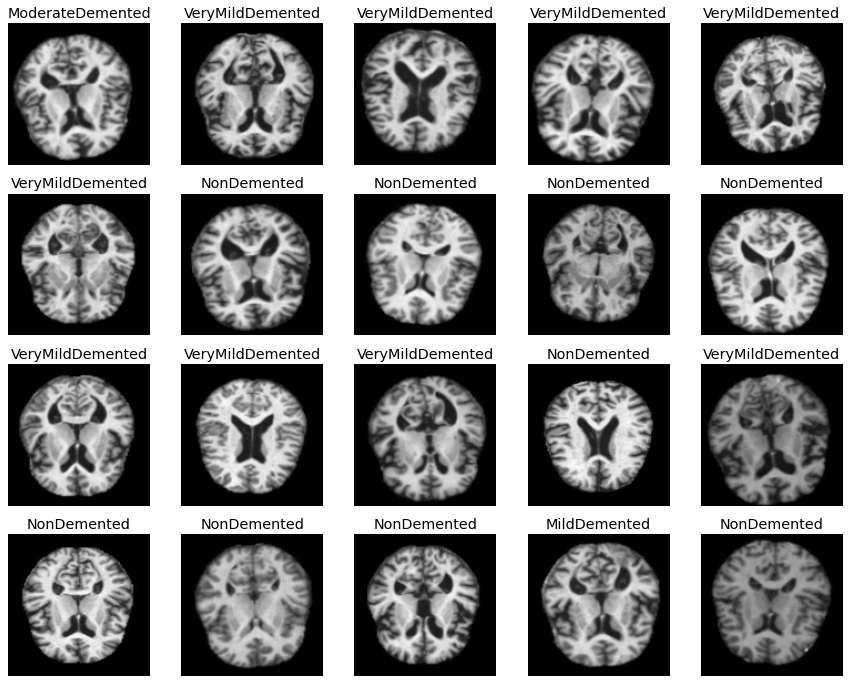

In [ ]:
dls.show_batch(max_n=20)

In [ ]:
learn=cnn_learner(dls,vgg16_bn,metrics=[accuracy,error_rate])

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0014454397605732083)

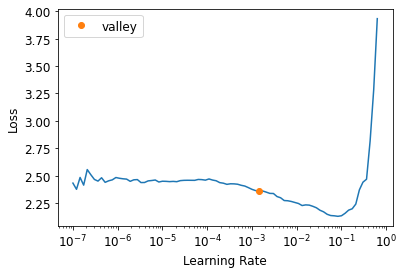

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(100,2.30e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.152453,1.266005,0.488281,0.511719,00:32
1,1.925872,1.171283,0.548828,0.451172,00:33
2,1.736275,1.068251,0.588867,0.411133,00:33
3,1.564377,0.944450,0.631836,0.368164,00:33
4,1.383977,0.843397,0.671875,0.328125,00:33
5,1.260176,0.772780,0.693359,0.306641,00:33
6,1.115226,0.680857,0.727539,0.272461,00:33
7,0.970556,0.628028,0.751953,0.248047,00:33
8,0.870984,0.630422,0.749023,0.250977,00:33
9,0.775185,0.546353,0.767578,0.232422,00:33


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.152453,1.266005,0.488281,0.511719,00:32
1,1.925872,1.171283,0.548828,0.451172,00:33
2,1.736275,1.068251,0.588867,0.411133,00:33
3,1.564377,0.944450,0.631836,0.368164,00:33
4,1.383977,0.843397,0.671875,0.328125,00:33
5,1.260176,0.772780,0.693359,0.306641,00:33
6,1.115226,0.680857,0.727539,0.272461,00:33
7,0.970556,0.628028,0.751953,0.248047,00:33
8,0.870984,0.630422,0.749023,0.250977,00:33
9,0.775185,0.546353,0.767578,0.232422,00:33


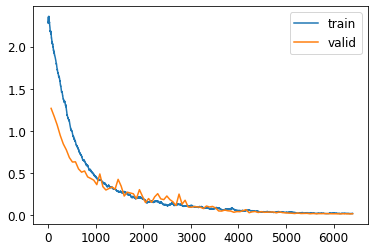

In [ ]:
learn.recorder.plot_loss()

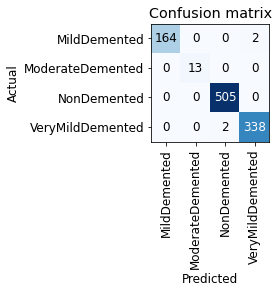

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

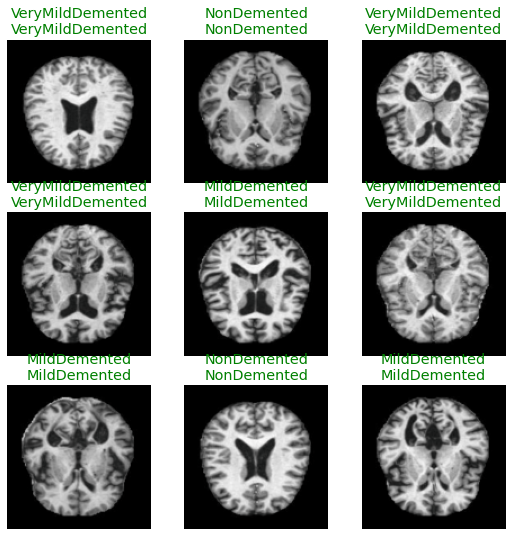

In [ ]:
learn.show_results()

In [ ]:
learn.summary()

Sequential (Input shape: 64 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 128 x 128 
Conv2d                                    1792       False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36928      False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 64 x 64   
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 128 x 64 x 64  
Conv2d                                    73856      False     
BatchNorm2d                               256        True      
ReLU                               

In [ ]:
interp.print_classification_report()

                  precision    recall  f1-score   support

    MildDemented       1.00      0.99      0.99       166
ModerateDemented       1.00      1.00      1.00        13
     NonDemented       1.00      1.00      1.00       505
VeryMildDemented       0.99      0.99      0.99       340

        accuracy                           1.00      1024
       macro avg       1.00      1.00      1.00      1024
    weighted avg       1.00      1.00      1.00      1024

